<h1>Extracting and Analyzing Stock Data</h1>
<h2>Description</h2>

A stock, also known as equity, is a security that represents the ownership of a fraction of the issuing corporation. Units of stock are called "shares" which entitles the owner to a proportion of the corporation's assets and profits equal to how much stock they own. 

For this project, I extracted, analysed and display graph for Tesla and Gamestop stocks data from Yahoo Finance.

<h3>Aim of the project</h3>

Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. 

This project analyses the stock price of tesla and gamestop from       and generate insights from the stock data. The stock data will be visualized to observe the trend over the time.

<h3>Import Libraries</h3>

In [ ]:
!pip install yfinance==0.1.70
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install pandas==1.3.5

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot

<h3>Using yfinance to extract stock data</h3>

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and Gamestop and the ticker symbols are TSLA and GME respectively. 

In [7]:
tesla = yf.Ticker("TSLA")

In [9]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function history extract stock information and save it in a dataframe. Set the period parameter to max so we get information for the maximum amount of time.

In [11]:
tesla_data = tesla.history(period="max")

In [13]:
gamestop_data = gamestop.history(period="max")

In [15]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [17]:
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [43]:
#check number of rolls and columns
tesla_data.shape

(3344, 8)

In [45]:
gamestop_data.shape

(5452, 8)

In [47]:
#check information about the data sets
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344 entries, 0 to 3343
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3344 non-null   datetime64[ns]
 1   Open          3344 non-null   float64       
 2   High          3344 non-null   float64       
 3   Low           3344 non-null   float64       
 4   Close         3344 non-null   float64       
 5   Volume        3344 non-null   int64         
 6   Dividends     3344 non-null   int64         
 7   Stock Splits  3344 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 209.1 KB


In [49]:
gamestop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452 entries, 0 to 5451
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5452 non-null   datetime64[ns]
 1   Open          5452 non-null   float64       
 2   High          5452 non-null   float64       
 3   Low           5452 non-null   float64       
 4   Close         5452 non-null   float64       
 5   Volume        5452 non-null   int64         
 6   Dividends     5452 non-null   float64       
 7   Stock Splits  5452 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 340.9 KB


The data types are accurate, so we check for missing values, duplicate values and statistical information about the data sets.

In [52]:
#check for missing values
tesla_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [54]:
gamestop_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [61]:
#check for duplicate values
tesla_data.duplicated().sum()

0

In [65]:
gamestop_data.duplicated().sum()

0

In [67]:
#check statistiscal information
tesla_data.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3344,3344.000000,3344.000000,3344.000000,3344.000000,3.344000e+03,3344.0,3344.000000
mean,2017-02-16 19:30:00,67.726512,69.237343,66.107580,67.716671,9.639244e+07,0.0,0.002392
min,2010-06-29 00:00:00,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,2013-10-22 18:00:00,10.145333,10.389167,9.862334,10.076667,4.536892e+07,0.0,0.000000
50%,2017-02-16 12:00:00,16.765667,16.998667,16.531667,16.767334,8.006065e+07,0.0,0.000000
75%,2020-06-15 06:00:00,65.461836,66.623333,63.311668,65.010836,1.230788e+08,0.0,0.000000
max,2023-10-10 00:00:00,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000
std,NaN,100.084703,102.349719,97.604138,100.020916,8.062677e+07,0.0,0.100821


In [69]:
gamestop_data.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5452,5452.000000,5452.000000,5452.000000,5452.000000,5.452000e+03,5452.000000,5452.000000
mean,2012-12-10 15:15:42.920029184,7.714897,7.987472,7.448054,7.697466,1.432597e+07,0.000438,0.001101
min,2002-02-13 00:00:00,0.643843,0.672458,0.631219,0.638793,2.600000e+05,0.000000,0.000000
25%,2007-07-15 06:00:00,2.852058,2.902421,2.795132,2.849739,5.646600e+06,0.000000,0.000000
50%,2012-12-10 12:00:00,4.123964,4.198343,4.043055,4.124805,9.726000e+06,0.000000,0.000000
75%,2018-05-10 06:00:00,7.250067,7.383121,7.120777,7.255231,1.516550e+07,0.000000,0.000000
max,2023-10-10 00:00:00,94.927498,120.750000,72.877502,86.877502,7.886316e+08,0.095000,4.000000
std,NaN,10.604526,11.252943,9.981238,10.520616,2.932944e+07,0.006111,0.060563


The columns dividend and stock splits are not useful in out analysis so they will be excluded from the data sets.

In [19]:
tesla_dataset = tesla_data[['Date', 'Open', 'High', 'Low', 'Close','Volume']]
tesla_dataset

,Date,Open,High,Low,Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...,...
3341,2023-10-06,253.979996,261.649994,250.649994,260.529999,117947000
3342,2023-10-09,255.309998,261.359985,252.050003,259.670013,101377900
3343,2023-10-10,257.750000,268.940002,257.649994,263.619995,122656000
3344,2023-10-11,266.200012,268.600006,260.899994,262.989990,103706300


In [21]:
gamestop_dataset = gamestop_data[['Date', 'Open', 'High', 'Low', 'Close','Volume']]
gamestop_dataset

,Date,Open,High,Low,Close,Volume
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000
1,2002-02-14,1.712707,1.716073,1.670625,1.683250,11021600
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800
...,...,...,...,...,...,...
5449,2023-10-06,14.590000,15.260000,14.580000,15.080000,2458300
5450,2023-10-09,14.770000,15.500000,14.720000,15.400000,2276300
5451,2023-10-10,15.500000,16.190001,15.400000,16.000000,2915900
5452,2023-10-11,16.010000,16.090000,15.740000,15.820000,2098200


<h3>Distribution of open, high, low, close and volume of both stock data.</h3>

Text(0, 0.5, 'Count')

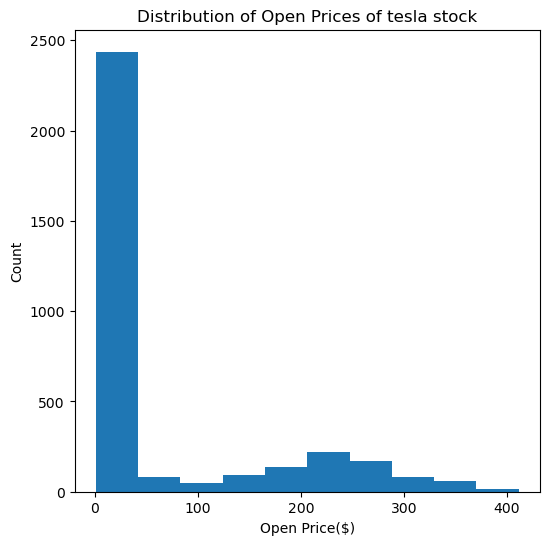

In [36]:
#Distribution of open prices 
plt.figure(figsize=[6, 6])
bins = 10
plt.hist(data = tesla_dataset, x = 'Open', bins=bins)
plt.title('Distribution of Open Prices of tesla stock')
plt.xlabel('Open Price($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

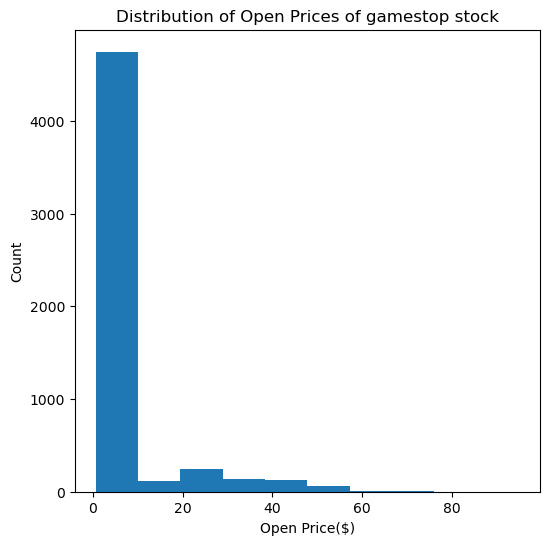

In [38]:
plt.figure(figsize=[6, 6])
bins = 10
plt.hist(data = gamestop_dataset, x = 'Open', bins=bins)
plt.title('Distribution of Open Prices of gamestop stock')
plt.xlabel('Open Price($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

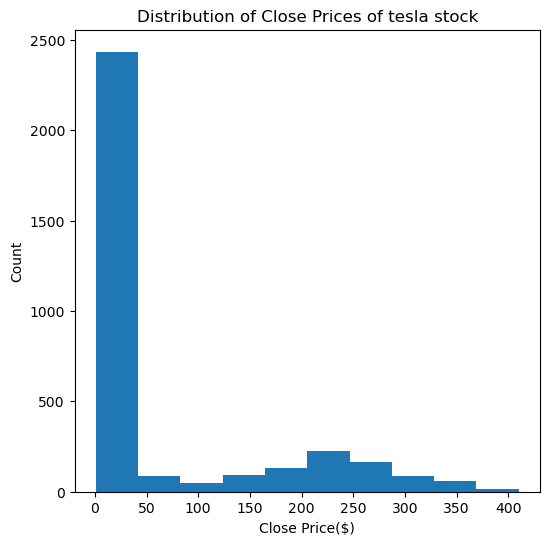

In [42]:
#Distribution of close prices
plt.figure(figsize=[6, 6])
bins = 10
plt.hist(data = tesla_dataset, x = 'Close', bins=bins)
plt.title('Distribution of Close Prices of tesla stock')
plt.xlabel('Close Price($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

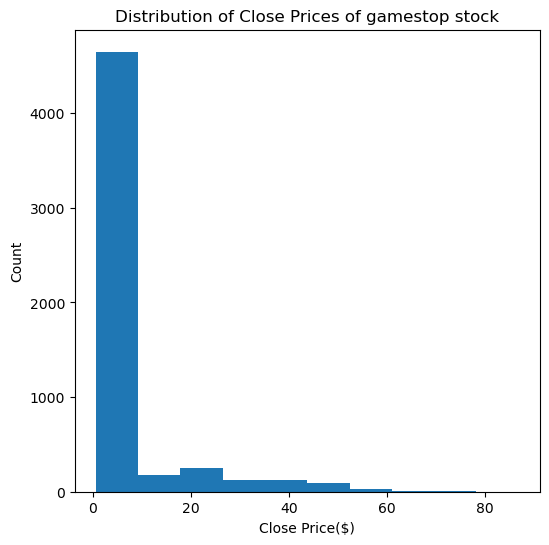

In [44]:
plt.figure(figsize=[6, 6])
bins = 10
plt.hist(data = gamestop_dataset, x = 'Close', bins=bins)
plt.title('Distribution of Close Prices of gamestop stock')
plt.xlabel('Close Price($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

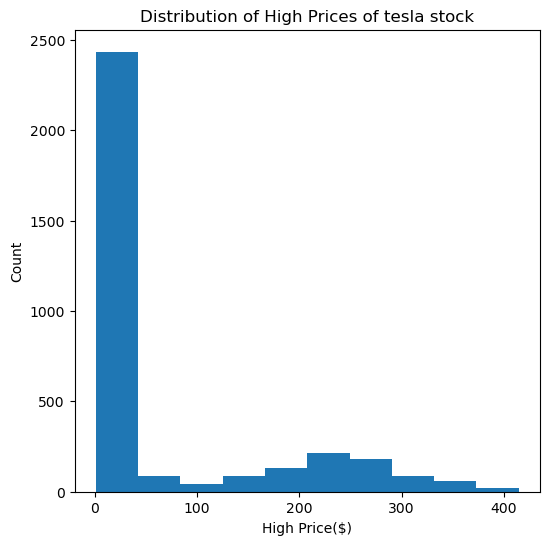

In [46]:
#Distribution of high prices 
plt.figure(figsize=[6, 6])
bins = 10
plt.hist(data = tesla_dataset, x = 'High', bins=bins)
plt.title('Distribution of High Prices of tesla stock')
plt.xlabel('High Price($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

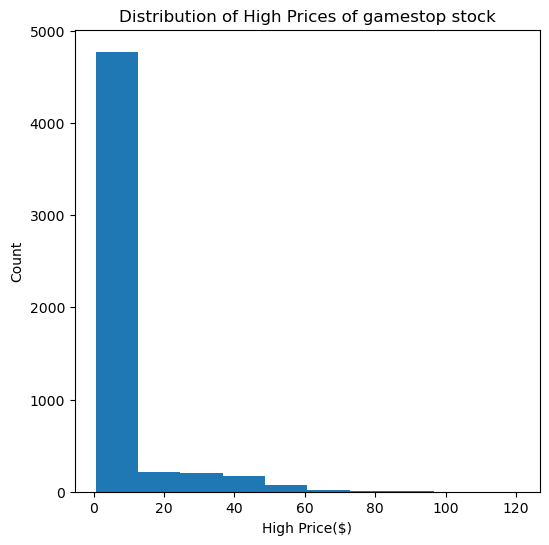

In [48]:
plt.figure(figsize=[6, 6])
bins = 10
plt.hist(data = gamestop_dataset, x = 'High', bins=bins)
plt.title('Distribution of High Prices of gamestop stock')
plt.xlabel('High Price($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

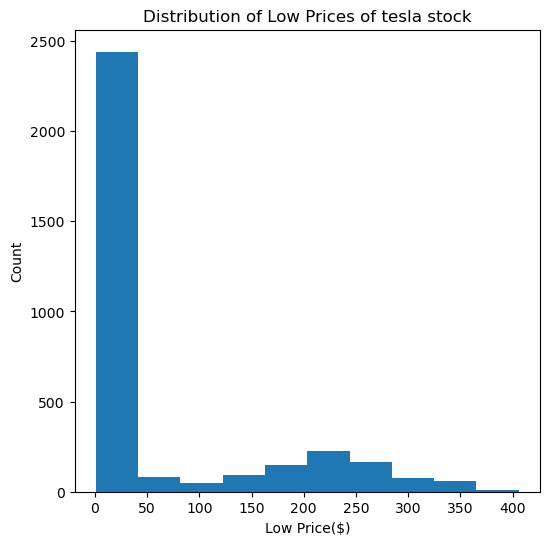

In [50]:
#Distribution of low prices
plt.figure(figsize=[6, 6])
bins = 10
plt.hist(data = tesla_dataset, x = 'Low', bins=bins)
plt.title('Distribution of Low Prices of tesla stock')
plt.xlabel('Low Price($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

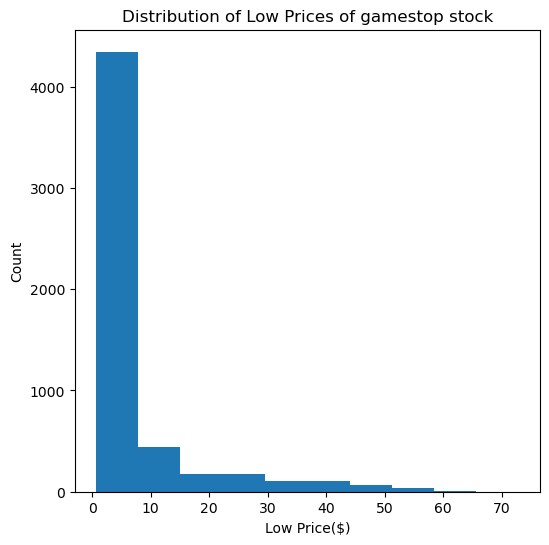

In [52]:
plt.figure(figsize=[6, 6])
bins = 10
plt.hist(data = gamestop_dataset, x = 'Low', bins=bins)
plt.title('Distribution of Low Prices of gamestop stock')
plt.xlabel('Low Price($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

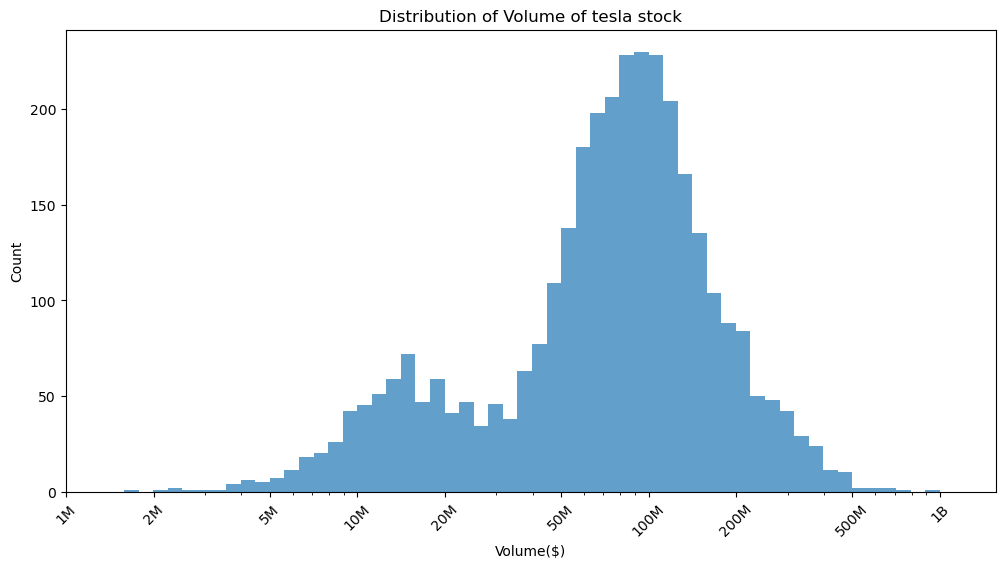

In [158]:
#Distribution of trading volumes for each stock
plt.figure(figsize=[12, 6])
log_binsize = 0.05
bins = 10 ** np.arange(6.2, 9.0 + log_binsize, log_binsize)
plt.figure(figsize=(12, 6))
plt.hist(tesla_dataset['Volume'], bins=bins, alpha=0.7)
plt.xscale('log')
x_ticks = [1e6, 2e6, 5e6, 1e7, 2e7, 5e7, 1e8, 2e8, 5e8, 1e9]
x_labels = ['1M', '2M', '5M', '10M', '20M', '50M', '100M', '200M', '500M', '1B']
plt.xticks(x_ticks, x_labels, rotation=45)
plt.title('Distribution of Volume of tesla stock')
plt.xlabel('Volume($)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

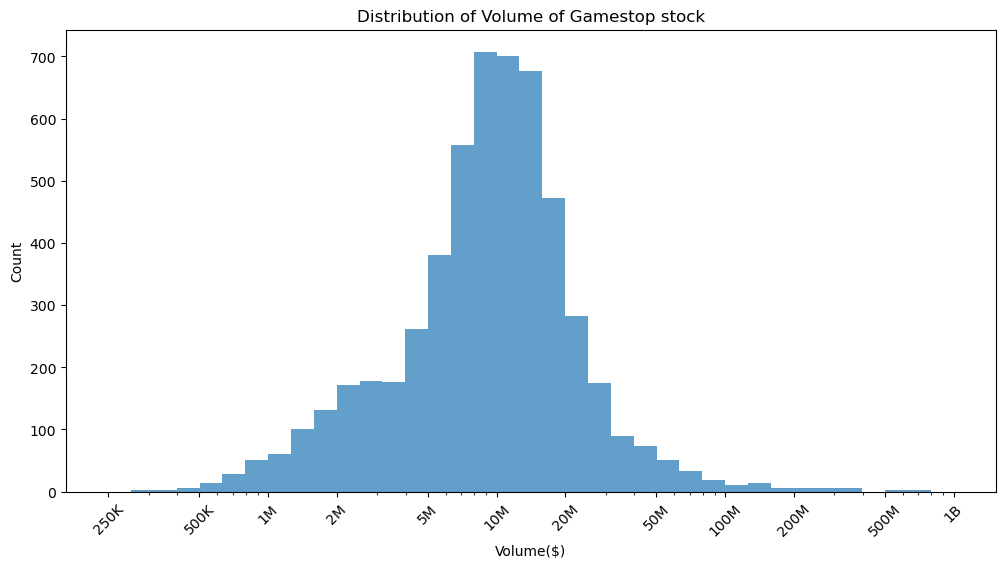

In [182]:
plt.figure(figsize=[12, 6])
log_binsize = 0.1
bins = 10 ** np.arange(5.3, 9.0 + log_binsize, log_binsize)
plt.figure(figsize=(12, 6))
plt.hist(gamestop_dataset['Volume'], bins=bins, alpha=0.7)
plt.xscale('log')
x_ticks = [2e5 ,5e5 , 1e6, 2e6, 5e6, 1e7, 2e7, 5e7, 1e8, 2e8, 5e8, 1e9]
x_labels = ['250K','500K','1M', '2M', '5M', '10M', '20M', '50M', '100M', '200M', '500M', '1B']
plt.xticks(x_ticks, x_labels, rotation=45)
plt.title('Distribution of Volume of Gamestop stock')
plt.xlabel('Volume($)')
plt.ylabel('Count')

**What were the highest and lowest stock prices?**

In [200]:
#Tesla highest and lowest stock prices
print('Highest stoke price for tesla:',tesla_dataset['High'].max(), '\n')
print('Lowest stoke price for tesla:',tesla_dataset['Low'].min())

Highest stoke price for tesla: 414.4966735839844 

Lowest stoke price for tesla: 0.9986670017242432


In [36]:
#Gamestop highest and lowest stock prices
print('Highest stoke price for gamestop:',gamestop_dataset['High'].max(), '\n')
print('Lowest stoke price for gamestop:',gamestop_dataset['Low'].min())

Highest stoke price for gamestop: 120.75 

Lowest stoke price for gamestop: 0.6312187707791683


**Show data for the highest and lowest prices**

In [28]:
#Date for highest and lowest price of tesla stocks
tesla_dataset[tesla_dataset['High']==414.4966735839844]

,Date,Open,High,Low,Close,Volume
2859,2021-11-04,411.470001,414.496674,405.666656,409.970001,76192200


In [30]:
tesla_dataset[tesla_dataset['Low']==0.9986670017242432]

,Date,Open,High,Low,Close,Volume
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,103825500


In [25]:
#Date for highest and lowest price of gamestop stocks
gamestop_dataset[gamestop_dataset['High']==120.75]

,Date,Open,High,Low,Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,235263200


In [38]:
gamestop_dataset[gamestop_dataset['Low']==0.6312187707791683]

,Date,Open,High,Low,Close,Volume
250,2003-02-11,0.658151,0.672458,0.631219,0.638793,5256000


**Show data for the highest and lowest volumes**

In [52]:
#tesla highest trading volume data
tesla_highest_volume = tesla_dataset['Volume'].max()
tesla_dataset[tesla_dataset['Volume']==tesla_highest_volume]

,Date,Open,High,Low,Close,Volume
2416,2020-02-04,58.863998,64.599335,55.591999,59.137333,914082000


In [54]:
#tesla lowest trading volume data
tesla_least_volume = tesla_dataset['Volume'].min()
tesla_dataset[tesla_dataset['Volume']==tesla_least_volume]

,Date,Open,High,Low,Close,Volume
82,2010-10-25,1.396,1.398667,1.382,1.39,1777500


In [56]:
#gamestop highest trading volume data
gamestop_highest_volume = gamestop_dataset['Volume'].max()
gamestop_dataset[gamestop_dataset['Volume']==gamestop_highest_volume] 

,Date,Open,High,Low,Close,Volume
4768,2021-01-22,10.6475,19.190001,10.58,16.252501,788631600


In [58]:
#gamestop lowest trading volume data
gamestop_least_volume = gamestop_dataset['Volume'].min()
gamestop_dataset[gamestop_dataset['Volume']==gamestop_least_volume]

,Date,Open,High,Low,Close,Volume
86,2002-06-18,1.937421,1.948362,1.876824,1.89534,260000


**Is there correlation between Open, High, Low, Close and Volume?** 

In [61]:
tesla_dataset.corr()

,Date,Open,High,Low,Close,Volume
Date,1.000000,0.760886,0.761048,0.761163,0.761222,0.400635
Open,0.760886,1.000000,0.999726,0.999618,0.999211,0.099242
High,0.761048,0.999726,1.000000,0.999626,0.999647,0.102821
Low,0.761163,0.999618,0.999626,1.000000,0.999683,0.095961
Close,0.761222,0.999211,0.999647,0.999683,1.000000,0.100193
Volume,0.400635,0.099242,0.102821,0.095961,0.100193,1.000000


In [65]:
gamestop_dataset.corr()

,Date,Open,High,Low,Close,Volume
Date,1.000000,0.526177,0.521809,0.531370,0.528326,0.184854
Open,0.526177,1.000000,0.995713,0.994947,0.995804,0.152361
High,0.521809,0.995713,1.000000,0.987407,0.993616,0.193414
Low,0.531370,0.994947,0.987407,1.000000,0.997013,0.113648
Close,0.528326,0.995804,0.993616,0.997013,1.000000,0.151815
Volume,0.184854,0.152361,0.193414,0.113648,0.151815,1.000000


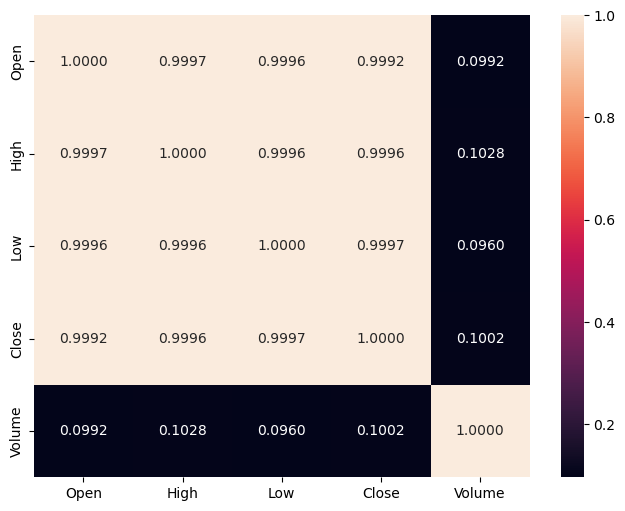

In [71]:
plt.figure(figsize = [8, 6])
sb.heatmap(tesla_dataset[['Open','High','Low', 'Close','Volume']].corr(), annot = True, fmt = '.4f')
plt.show()

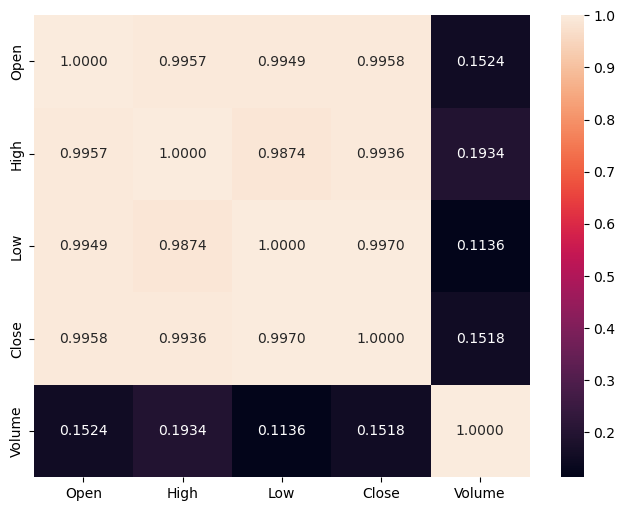

In [73]:
plt.figure(figsize = [8, 6])
sb.heatmap(gamestop_dataset[['Open','High','Low', 'Close','Volume']].corr(), annot = True, fmt = '.4f')
plt.show()

The correlation between open,close, high, low and volume is very low, thus there is no significant correlation between them. Therefore the volume of the stock is not affected by an increase or decrease in the price of the stock. 

<h3>Visualization of the stock data</h3>

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 0, 'Date')

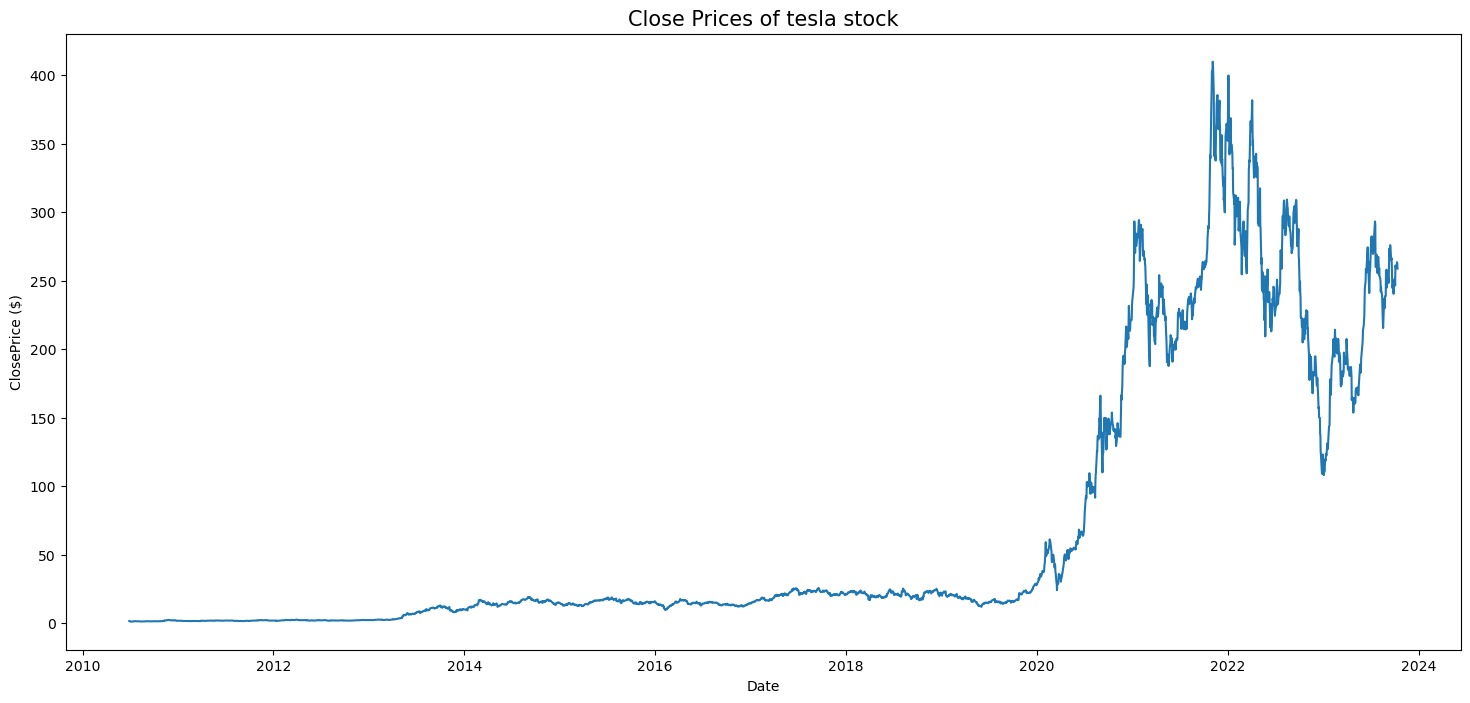

In [131]:
plt.figure(figsize=(18,8))
sb.lineplot(data=tesla_dataset, x='Date', y='Close')
plt.title('Close Prices of tesla stock', fontsize=15)
plt.ylabel('ClosePrice ($)')
plt.xlabel('Date')

Text(0, 0.5, 'Volume ($)')

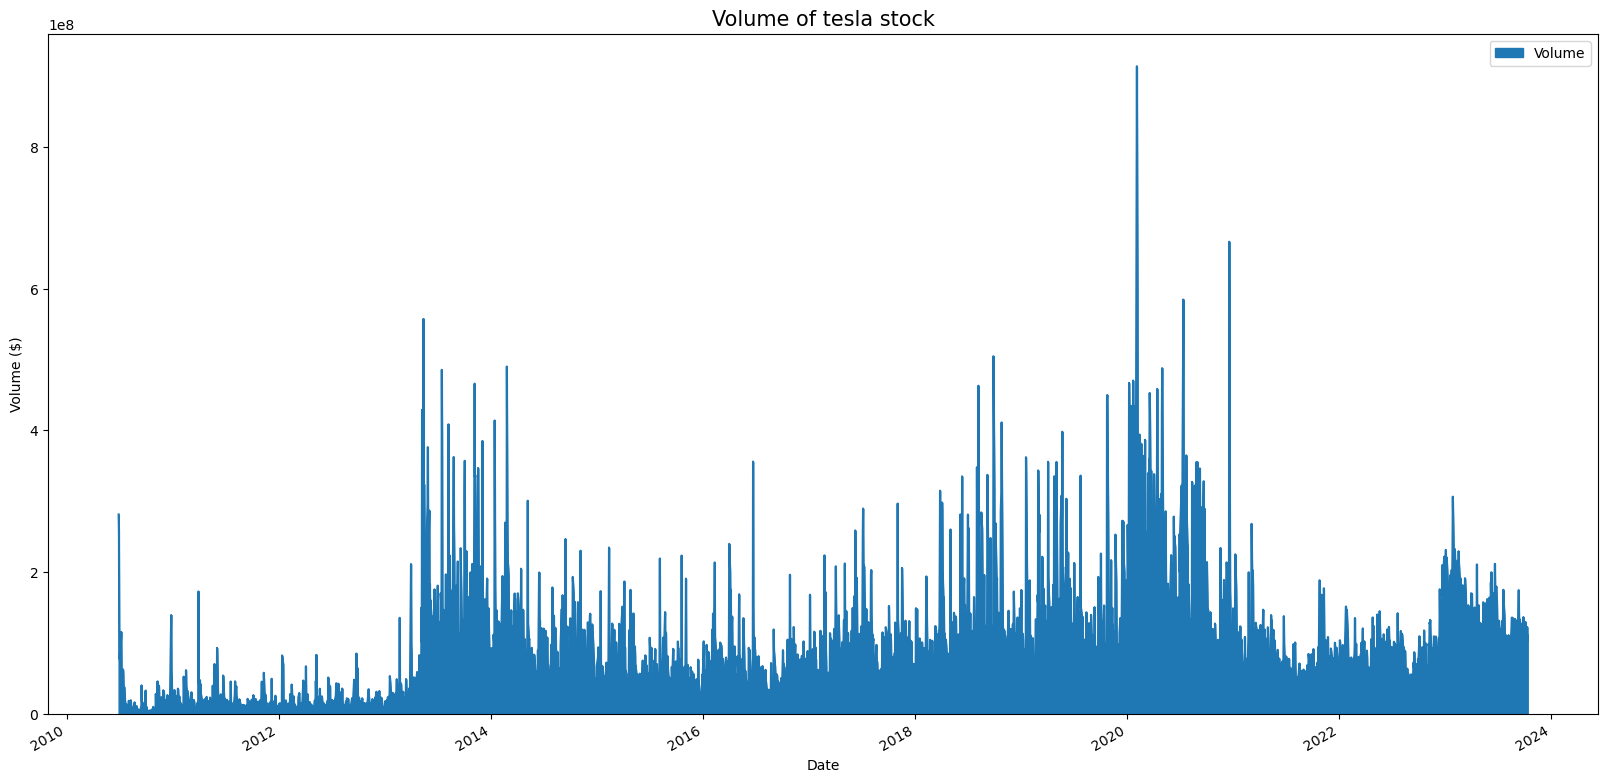

In [123]:
tesla_dataset.plot(x="Date", y="Volume",kind='area', figsize=(20,10))
plt.title('Volume of tesla stock', fontsize=15)
plt.ylabel('Volume ($)')
plt.xlabel('Date')

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0, 0.5, 'ClosePrice ($)')

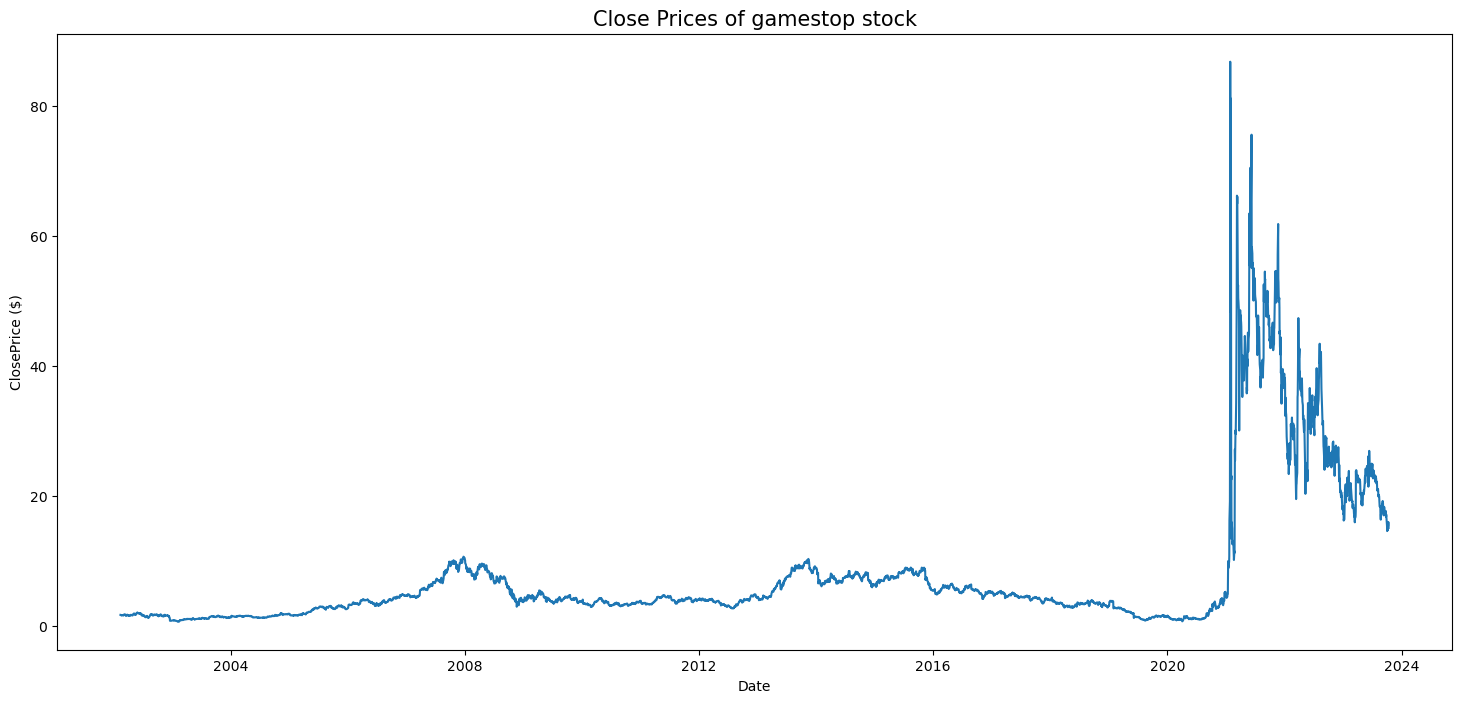

In [127]:
plt.figure(figsize=(18,8))
sb.lineplot(data=gamestop_dataset, x='Date', y='Close')
plt.title('Close Prices of gamestop stock', fontsize=15)
plt.ylabel('ClosePrice ($)')
plt.xlabel('Date')

Text(0, 0.5, 'Volume ($)')

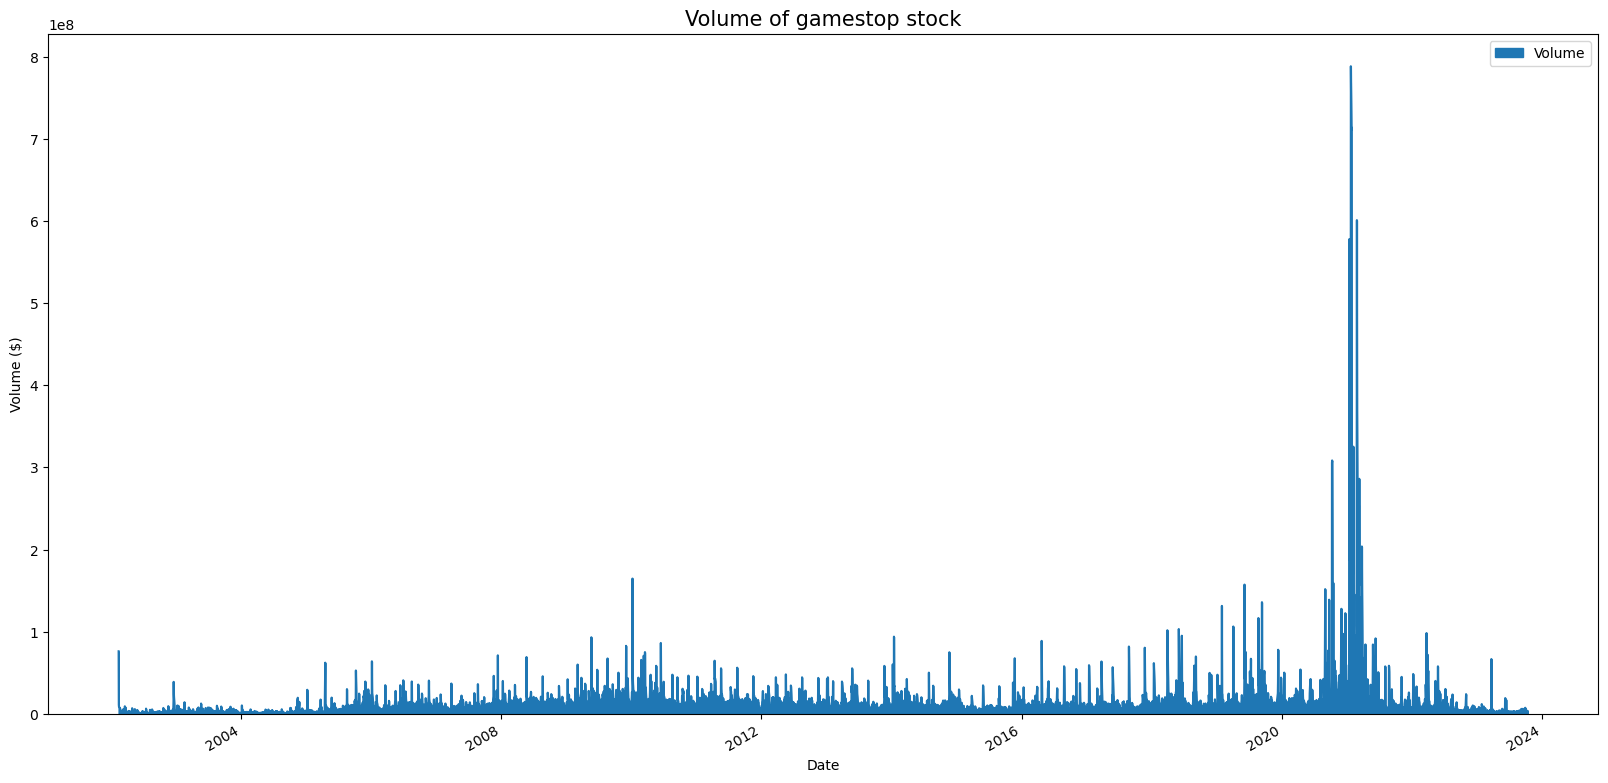

In [129]:
gamestop_dataset.plot(x="Date", y="Volume",kind='area', figsize=(20,10))
plt.title('Volume of gamestop stock', fontsize=15)
plt.ylabel('Volume ($)')
plt.xlabel('Date')

<h2>Conclusion</h2>

<ul>
    <li>Tesla and Gamestop Stock saw sharp increase in price between 2020 and 2022, with both hitting peak prices. However since making those peak prices their prices saw significant decline, with gamestop having about 75% decline and tesla over 37% decline</li>
    <li>The peak prices of Tesla and Gamestop stock are 414.4966 and 120.75 respectively. These peak prices occurred on 4th November 2021 for Tesla and 4th February 2020 for Gamestop</li>
    <li>The lowest prices of Tesla and Gamestop stock are 0.9986670017242432 and 0.6312187707791683 respectively. These peak prices occurred on 7th July 2010 for Tesla and 11th February 2003 for Gamestop</li>
    <li>The peak volume of Tesla and Gamestop stock are 914082000 and 788631600 respectively while lowest trading volume are 1777500 and 260000 </li>   
    <li>There is no significant correlation between the price of the stock and volume of the stock</li>  
</ul>